<a href="https://colab.research.google.com/github/ChitranshS/DL_Lab_Sem6/blob/main/DL_Lab_2_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-hub
!pip install opencv-python

In [19]:
!curl -o style.jpg https://imgur.com/9ooB60I
!curl -o content.jpg https://i.imgur.com/F28w3Ac.jpg



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8435    0  8435    0     0  84014      0 --:--:-- --:--:-- --:--:-- 84350


In [7]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config;np_config.enable_numpy_behavior()

In [16]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img/255.0
    return img

In [17]:
content_image = load_img('/content/9ooB60I.jpeg')
style_1 = load_img('/content/F28w3Ac.jpg')


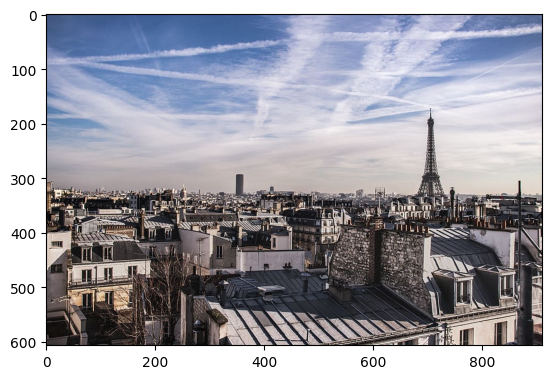

In [23]:
plt.imshow(style_1)

In [25]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [29]:
  def apply_style(content_image,style):
    content_image = content_image.reshape(1,content_image.shape[0],
    content_image.shape[1],content_image.shape[2]).astype('float32')
    content_image = tf.convert_to_tensor(content_image)
    style = cv2.resize(style,(256,256))
    style = style.reshape(1,style.shape[0],
    style.shape[1],style.shape[2]).astype('float32')
    outputs = model(tf.constant(content_image),tf.constant(style))
    stylized_image = outputs[0]
    return stylized_image

In [30]:
styled_image = apply_style(content_image,style_1)


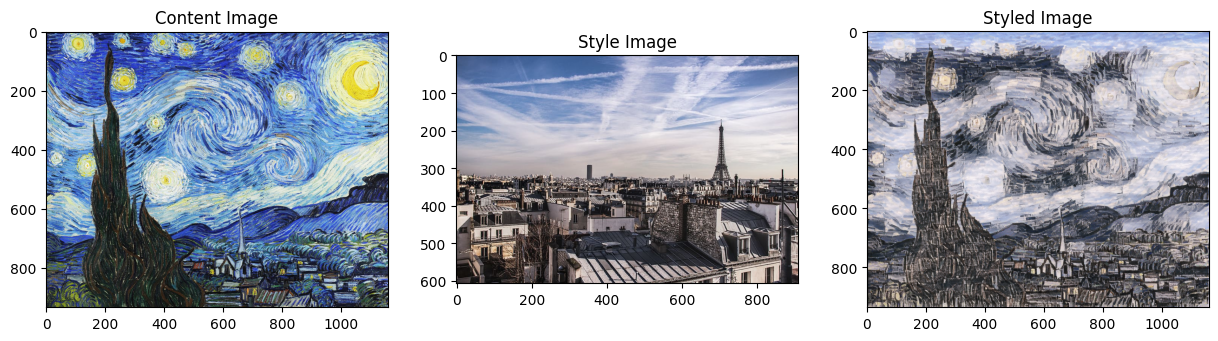

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].set_title("Content Image")
axes[1].set_title("Style Image")
axes[2].set_title("Styled Image")

axes[0].imshow(content_image)
axes[1].imshow(style_1)
axes[2].imshow(styled_image[0])

plt.show()
